<img src="Header.png" alt="Python Cientifico de" style="width: 1000px;"/>

# Heat

```python
FEniCS tutorial demo program: Heat equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  u'= Laplace(u) + f  in the unit square
  u = u_D             on the boundary
  u = u_0             at t = 0

  u = 1 + x^2 + alpha*y^2 + \beta*t
  f = beta - 2 - 2*alpha
```

In [1]:
from __future__ import print_function
from fenics import *
import numpy as np

In [2]:
T = 2.0            # final time
num_steps = 10     # number of time steps
dt = T / num_steps # time step size
alpha = 3          # parameter alpha
beta = 1.2         # parameter beta

In [3]:
# Create mesh and define function space
nx = ny = 8
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t',
                 degree=2, alpha=alpha, beta=beta, t=0)

In [4]:
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

In [5]:
# Define initial value
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)

In [6]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta - 2 - 2*alpha)

In [7]:
F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

t = 0.20: error = 0.688
t = 0.40: error = 0.149
t = 0.60: error = 0.0298
t = 0.80: error = 0.00588
t = 1.00: error = 0.00115
t = 1.20: error = 0.000226
t = 1.40: error = 4.44e-05
t = 1.60: error = 8.7e-06
t = 1.80: error = 1.71e-06
t = 2.00: error = 3.34e-07


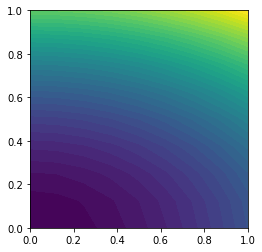

In [9]:
# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)

    # Plot solution
    plot(u)

    # Compute error at vertices
    u_e = interpolate(u_D, V)
    error = np.abs(u_e.vector() - u.vector()).max()
    print('t = %.2f: error = %.3g' % (t, error))

    # Update previous solution
    u_n.assign(u)